**Diplomatura en Ciencia de Datos, Aprendizaje Automático y sus Aplicaciones**

**Exploración y Curación de Datos**

*Edición 2021*

----

# Trabajo práctico entregable - parte 1

En esta notebook, vamos a cargar el conjunto de datos de [la compentencia Kaggle](https://www.kaggle.com/dansbecker/melbourne-housing-snapshot) sobre estimación de precios de ventas de propiedades en Melbourne, Australia.

Utilizaremos el conjunto de datos reducido producido por [DanB](https://www.kaggle.com/dansbecker). Hemos subido una copia a un servidor de la Universidad Nacional de Córdoba para facilitar su acceso remoto.

In [5]:
import io
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
sns.set_context('talk')

In [6]:
import plotly
plotly.__version__
# Make sure it's 4.14.3

'4.4.1'

In [87]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [88]:
import os
os.chdir('/content/drive/My Drive/Entregable2_Diplo')

In [7]:
# To update plotly, uncomment and run the following line:
# !pip install plotly --upgrade

In [9]:
melb_df = pd.read_csv('https://cs.famaf.unc.edu.ar/~mteruel/datasets/diplodatos/melb_data.csv')
melb_df.sample(10)

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
12273,Dandenong,18 Bulong St,3,h,500000.0,S,C21,3/09/2017,24.7,3175.0,3.0,1.0,1.0,372.0,NaN,NaN,NaN,-37.98383,145.20342,South-Eastern Metropolitan,10894.0
1320,Brunswick,2 Chambers St,3,h,1691500.0,S,Nelson,17/09/2016,5.2,3056.0,3.0,2.0,3.0,470.0,152.0,1920.0,Moreland,-37.77880,144.96880,Northern Metropolitan,11918.0
2387,Essendon,159 Cooper St,3,t,650000.0,S,Barry,13/08/2016,8.0,3040.0,3.0,2.0,1.0,160.0,129.0,1985.0,Moonee Valley,-37.74030,144.89890,Western Metropolitan,9264.0
9249,Mount Waverley,3/593 High Street Rd,2,u,572000.0,S,Ray,3/06/2017,14.2,3149.0,2.0,1.0,1.0,173.0,NaN,1970.0,Monash,-37.87142,145.14503,Eastern Metropolitan,13366.0
9446,Brighton,2/58 North Rd,3,u,1410000.0,S,Nick,17/06/2017,10.5,3186.0,3.0,2.0,2.0,257.0,NaN,NaN,Bayside,-37.89886,144.99462,Southern Metropolitan,10579.0
10968,Clarinda,10 Boree Av,4,h,1241000.0,S,Woodards,12/08/2017,17.5,3169.0,4.0,2.0,2.0,625.0,625.0,1950.0,Kingston,-37.92801,145.10570,South-Eastern Metropolitan,2727.0
12301,Flemington,43 Waltham St,3,h,1500000.0,VB,Nelson,3/09/2017,3.4,3031.0,3.0,1.0,2.0,241.0,119.0,NaN,NaN,-37.78365,144.93015,Northern Metropolitan,3593.0
1928,Coburg,191 Ohea St,4,h,905000.0,S,LITTLE,4/06/2016,7.8,3058.0,3.0,2.0,1.0,439.0,NaN,NaN,Moreland,-37.73630,144.95070,Northern Metropolitan,11204.0
487,Avondale Heights,235 Military Rd,3,h,863000.0,S,Barry,28/08/2016,10.5,3034.0,3.0,2.0,3.0,638.0,NaN,NaN,Moonee Valley,-37.75460,144.85850,Western Metropolitan,4502.0
10361,Keilor Park,55 Erebus St,3,h,752500.0,S,Nelson,27/05/2017,10.4,3042.0,3.0,2.0,1.0,468.0,144.0,NaN,Brimbank,-37.72203,144.85994,Western Metropolitan,1119.0


## Ejercicio 1: 

1. Eliminar los valores extremos que no sean relevantes para la predicción de valores de las propiedades.

1. Investigar la distribución de las variables del conjunto de datos y seleccionar un subconjunto de columnas que les parezcan relevantes al problema de predicción del valor de la propiedad.
  1. Justificar cada columna no seleccionada.
  2. Para las variables categóricas seleccionadas, agrupe o combine las categorías poco frecuentes para asegurar que todos los grupos tengan un número mínimo de registros.

2. Agregar información adicional respectiva al entorno de una propiedad a partir del [conjunto de datos de AirBnB](https://www.kaggle.com/tylerx/melbourne-airbnb-open-data?select=cleansed_listings_dec18.csv) utilizado en el práctico. 
  1. Seleccionar qué variables agregar y qué combinaciones aplicar a cada una. Por ejemplo, pueden utilizar solo la columna `price`, o aplicar múltiples transformaciones como la mediana o el mínimo.
  1. Utilizar la variable zipcode para unir los conjuntos de datos. Sólo incluir los zipcodes que tengan una cantidad mínima de registros (a elección) como para que la información agregada sea relevante.
  2. Investigar al menos otras 2 variables que puedan servir para combinar los datos, y justificar si serían adecuadas o no. Pueden asumir que cuentan con la ayuda de anotadores expertos para encontrar equivalencias entre barrios o direcciones, o que cuentan con algoritmos para encontrar las n ubicaciones más cercanas a una propiedad a partir de sus coordenadas geográficas. **NO** es necesario que realicen la implementación.

Pueden leer otras columnas del conjunto de AirBnB además de las que están en `interesting_cols`, si les parecen relevantes.


Descripción de las columnas del dataset:

Suburb: Barrio en donde se encuentra la propiedad

Address: Dirección de la propiedad

Rooms: Número de ambientes de la propiedad

Type: Tipo de propiedad

Price: Precio de la propiedad

Method: Método de venta de la propiedad

SellerG: Vendedor

Date: Fecha de venta de la propiedad

Distance: Distancia de la propiedad al centro

Postcode: Código postal

Bedroom2: Número de habitaciones recolectadas de un dataset secundario

Bathroom: Número de baños

Car: Número de cocheras

Landsize: Metros cuadrados de parque

BuildingArea:	Metros cuadrados construidos

YearBuilt: Año de construcción

CouncilArea: Ciudad donde se encuentra la propiedad

Lattitude: Latitud

Longtitude: Longitud

Regionname:	Región geográfica donde se encuentra la propiedad

Propertycount: Número de propiedades en el barrio

In [98]:
melb_df.describe()

,Rooms,Price,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,Propertycount
count,13390.000000,1.339000e+04,13390.000000,13390.000000,13390.000000,13390.000000,13390.000000,13390.000000,7040.000000,8102.000000,13390.000000,13390.000000,13390.000000
mean,2.935176,1.071214e+06,10.148125,3104.914414,2.912323,1.533682,1.602614,555.209111,152.178722,1965.265984,-37.809306,144.995381,7454.638237
std,0.949534,6.325251e+05,5.800355,90.455403,0.939068,0.674333,0.925345,4002.041235,544.295339,35.786402,0.079095,0.103647,4382.679315
min,1.000000,8.500000e+04,0.000000,3000.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1880.000000,-38.182550,144.542370,389.000000
25%,2.000000,6.500000e+05,6.200000,3044.000000,2.000000,1.000000,1.000000,178.000000,93.000000,1941.000000,-37.857000,144.929115,4380.000000
50%,3.000000,9.000000e+05,9.200000,3084.000000,3.000000,1.000000,2.000000,442.000000,126.000000,1970.000000,-37.802145,145.000225,6567.000000
75%,3.000000,1.325000e+06,13.000000,3147.000000,3.000000,2.000000,2.000000,650.000000,174.000000,1999.000000,-37.756100,145.058675,10331.000000
max,8.000000,9.000000e+06,48.100000,3977.000000,7.000000,5.000000,6.000000,433014.000000,44515.000000,2018.000000,-37.408530,145.526350,21650.000000


Evaluamos los valores extremos y la cantidad de categorías que hay dentro de las columnas que vamos a utilizar para predecir el valor de la propiedad

In [100]:
pd.unique(melb_df.Suburb.sort_values())

array(['Abbotsford', 'Aberfeldie', 'Airport West', 'Albanvale',
       'Albert Park', 'Albion', 'Alphington', 'Altona', 'Altona Meadows',
       'Altona North', 'Ardeer', 'Armadale', 'Ascot Vale', 'Ashburton',
       'Ashwood', 'Aspendale', 'Aspendale Gardens', 'Attwood',
       'Avondale Heights', 'Balaclava', 'Balwyn', 'Balwyn North',
       'Bayswater', 'Bayswater North', 'Beaconsfield',
       'Beaconsfield Upper', 'Beaumaris', 'Bellfield', 'Bentleigh',
       'Bentleigh East', 'Berwick', 'Black Rock', 'Blackburn',
       'Blackburn North', 'Blackburn South', 'Bonbeach', 'Boronia',
       'Box Hill', 'Braybrook', 'Briar Hill', 'Brighton', 'Brighton East',
       'Broadmeadows', 'Brookfield', 'Brooklyn', 'Brunswick',
       'Brunswick East', 'Brunswick West', 'Bulleen', 'Bundoora',
       'Burnley', 'Burnside', 'Burnside Heights', 'Burwood',
       'Burwood East', 'Cairnlea', 'Camberwell', 'Campbellfield',
       'Canterbury', 'Carlton', 'Carlton North', 'Carnegie',
       'Caroline

In [102]:
melb_df.Suburb.value_counts()

Reservoir         357
Richmond          257
Bentleigh East    246
Preston           235
Brunswick         221
                 ... 
Upwey               1
Whittlesea          1
Wonga Park          1
New Gisborne        1
Plumpton            1
Name: Suburb, Length: 311, dtype: int64

In [19]:
pd.unique(melb_df.Rooms.sort_values())

array([ 1,  2,  3,  4,  5,  6,  7,  8, 10])

In [44]:
melb_df.Rooms.value_counts()

3     5881
2     3648
4     2688
1      681
5      596
6       67
7       10
8        8
10       1
Name: Rooms, dtype: int64

In [11]:
pd.unique(melb_df.Type)

array(['h', 'u', 't'], dtype=object)

In [45]:
melb_df.Type.value_counts()

h    9449
u    3017
t    1114
Name: Type, dtype: int64

In [12]:
pd.unique(melb_df.Method)

array(['S', 'SP', 'PI', 'VB', 'SA'], dtype=object)

In [42]:
melb_df.Method.value_counts()

S     9022
SP    1703
PI    1564
VB    1199
SA      92
Name: Method, dtype: int64

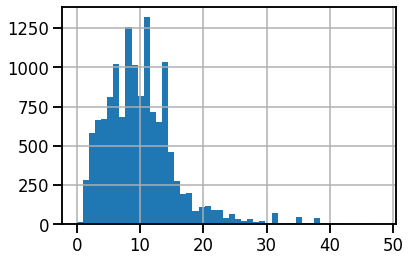

In [15]:
melb_df.Distance.hist(bins=50)

In [18]:
pd.unique(melb_df.Bedroom2.sort_values()) #se encuentra como valor 20 habitaciones, lo cual es llamativo ya que hay propiedades con un máximo 10 ambientes y también que haya propiedades sin habitaciones

array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 20.])

In [38]:
melb_df.Bedroom2.value_counts()

3.0     5896
2.0     3737
4.0     2601
1.0      691
5.0      556
6.0       63
0.0       16
7.0       10
8.0        5
9.0        3
10.0       1
20.0       1
Name: Bedroom2, dtype: int64

In [20]:
pd.unique(melb_df.Bathroom.sort_values()) #no sería posible encontrar casas con 0 baños

array([0., 1., 2., 3., 4., 5., 6., 7., 8.])

In [39]:
melb_df.Bathroom.value_counts()

1.0    7512
2.0    4974
3.0     917
4.0     106
0.0      34
5.0      28
6.0       5
8.0       2
7.0       2
Name: Bathroom, dtype: int64

In [21]:
pd.unique(melb_df.Car.sort_values()) #aparecen el valor nan

array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., nan])

In [37]:
melb_df.Car.value_counts()

2.0     5591
1.0     5509
0.0     1026
3.0      748
4.0      506
5.0       63
6.0       54
8.0        9
7.0        8
10.0       3
9.0        1
Name: Car, dtype: int64

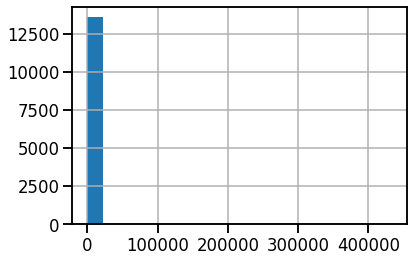

In [28]:
melb_df.Landsize.hist(bins=20) #el gráfico concuerda con lo visto en describe, hay un valor de propiedad que es exageradamente grande, el 75% de los valores de Landsize se encuentra alrededor de 600.

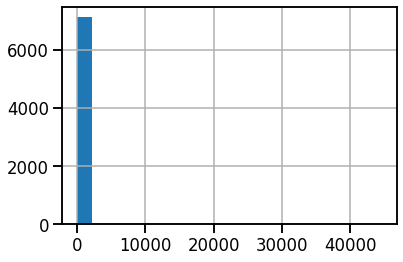

In [30]:
melb_df.BuildingArea.hist(bins=20) #caso similar a Landsize, el 75% de los valores de BuildindArea se encuentra alrededor de 170.

In [31]:
melb_df.BuildingArea.quantile(0.75)

174.0

In [32]:
pd.unique(melb_df.YearBuilt.sort_values()) #hay un valor cercano al año 1200 y la mayoría de los valores se encuentran por encima del año 1850. También hay valores nan

array([1196., 1830., 1850., 1854., 1856., 1857., 1860., 1862., 1863.,
       1868., 1870., 1872., 1875., 1877., 1880., 1884., 1885., 1886.,
       1887., 1888., 1889., 1890., 1892., 1893., 1894., 1895., 1896.,
       1897., 1898., 1900., 1901., 1902., 1903., 1904., 1905., 1906.,
       1907., 1908., 1910., 1912., 1913., 1914., 1915., 1916., 1917.,
       1918., 1919., 1920., 1921., 1922., 1923., 1924., 1925., 1926.,
       1927., 1928., 1929., 1930., 1932., 1933., 1934., 1935., 1936.,
       1937., 1938., 1939., 1940., 1941., 1942., 1943., 1945., 1946.,
       1947., 1948., 1949., 1950., 1951., 1952., 1953., 1954., 1955.,
       1956., 1957., 1958., 1959., 1960., 1961., 1962., 1963., 1964.,
       1965., 1966., 1967., 1968., 1969., 1970., 1971., 1972., 1973.,
       1974., 1975., 1976., 1977., 1978., 1979., 1980., 1981., 1982.,
       1983., 1984., 1985., 1986., 1987., 1988., 1989., 1990., 1991.,
       1992., 1993., 1994., 1995., 1996., 1997., 1998., 1999., 2000.,
       2001., 2002.,

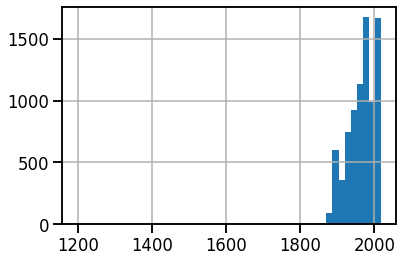

In [34]:
melb_df.YearBuilt.hist(bins=50)

In [35]:
pd.unique(melb_df.CouncilArea.sort_values()) #hay valores nan

array(['Banyule', 'Bayside', 'Boroondara', 'Brimbank', 'Cardinia',
       'Casey', 'Darebin', 'Frankston', 'Glen Eira', 'Greater Dandenong',
       'Hobsons Bay', 'Hume', 'Kingston', 'Knox', 'Macedon Ranges',
       'Manningham', 'Maribyrnong', 'Maroondah', 'Melbourne', 'Melton',
       'Monash', 'Moonee Valley', 'Moorabool', 'Moreland', 'Nillumbik',
       'Port Phillip', 'Stonnington', 'Unavailable', 'Whitehorse',
       'Whittlesea', 'Wyndham', 'Yarra', 'Yarra Ranges', nan],
      dtype=object)

In [43]:
melb_df.CouncilArea.value_counts()

Moreland             1163
Boroondara           1160
Moonee Valley         997
Darebin               934
Glen Eira             848
Stonnington           719
Maribyrnong           692
Yarra                 647
Port Phillip          628
Banyule               594
Bayside               489
Melbourne             470
Hobsons Bay           434
Brimbank              424
Monash                333
Manningham            311
Whitehorse            304
Kingston              207
Whittlesea            167
Hume                  164
Wyndham                86
Knox                   80
Maroondah              80
Melton                 66
Frankston              53
Greater Dandenong      52
Casey                  38
Nillumbik              36
Yarra Ranges           18
Cardinia                8
Macedon Ranges          7
Moorabool               1
Unavailable             1
Name: CouncilArea, dtype: int64

In [36]:
pd.unique(melb_df.Regionname)

array(['Northern Metropolitan', 'Western Metropolitan',
       'Southern Metropolitan', 'Eastern Metropolitan',
       'South-Eastern Metropolitan', 'Eastern Victoria',
       'Northern Victoria', 'Western Victoria'], dtype=object)

In [41]:
melb_df.Regionname.value_counts()

Southern Metropolitan         4695
Northern Metropolitan         3890
Western Metropolitan          2948
Eastern Metropolitan          1471
South-Eastern Metropolitan     450
Eastern Victoria                53
Northern Victoria               41
Western Victoria                32
Name: Regionname, dtype: int64

Es importante notar que tanto YearBuilt como Buildingarea tienen un elevado número de datos faltantes 7130/13580 y 8205/13580, respectivamente

A partir de los análisis descriptivos hechos hasta el momento vamos a descartar aquellas filas para las cuales Bedroom2 tenga un valor 0 (16) y valores mayores a 7 (20)

In [10]:
melb_df = melb_df.query('(Bedroom2 > 0) & (Bedroom2 < 8)')

Eliminamos las filas para las cuales Bathroom tenga un valor 0 (34) y valores mayores a 5 (9)

In [11]:
melb_df = melb_df.query('(Bathroom > 0) & (Bathroom < 6)')

Eliminamos las filas para las cuales Car tenga un valor mayor a 6 (21)

In [12]:
melb_df = melb_df.query('Car < 7')

Eliminamos las filas para las cuales Buildingarea es igual a 0 (no vamos a considerar propiedades vendidas al "pozo")

In [13]:
melb_df.drop(melb_df.query('BuildingArea == 0').index, inplace=True)

Eliminamos las filas para las cuales YearBuilt sea menor a 1850

In [14]:
melb_df.drop(melb_df.query('YearBuilt < 1880').index, inplace=True)

Eliminamos las filas para las cuales Councilarea es igual a Macedon Ranges y Moorabool (no pertenecen a Melbourne) y             Unavailable

In [15]:
melb_df.drop(melb_df.query('CouncilArea == "Macedon Ranges"').index, inplace=True)

In [16]:
melb_df.drop(melb_df.query('CouncilArea == "Moorabool"').index, inplace=True)

In [17]:
melb_df.drop(melb_df.query('CouncilArea == "Unavailable"').index, inplace=True)

Columnas del dataset que a priori no vamos a tener en cuenta para los análisis ya que no intervendrían en el valor de la propiedad

Address: hay una dirección para cada propiedad y hay otras columnas que aportan información sobre la ubicación de la propiedad, por ejemplo, Regionname, CouncilArea)

SellerG: el nombre del vendedor no debería interferir con el valor de la propiedad

Date: la fecha de venta no sería indicativo del valor de la propiedad

Lattitude y Longtitud: podría pensarse a la longitud y latitud de la misma manera que a dirección (address). Cabe aclarar que estas dos variables combinadas podrían ser útiles en cuanto a la ubicación específica de las propiedades en relación a otras características importantes de la región/barrio donde se encuentra (por ejemplo, cercanía a centros educativos, comercios etc).

Propertycount: es una variable relacionada a Suburb, se encuentra repetida con cada nombre de barrio diferente

Veamos que sucede con las variable Type and Method y el valor de las propiedades

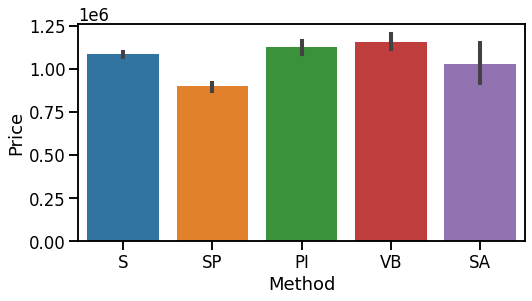

In [113]:
plt.subplots(figsize=(8,4))
sns.barplot(x=melb_df.Method, y=melb_df.Price)

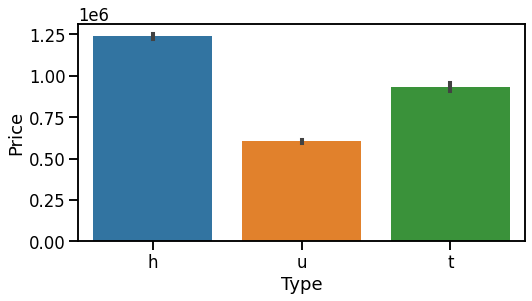

In [114]:
plt.subplots(figsize=(8,4))
sns.barplot(x=melb_df.Type, y=melb_df.Price)

El método de venta no parece influir sobre el precio de las propiedades. El método SA parece tener valores más bajos pero representa un porcentaje bajo del total de transacciones según lo observado con anterioridad. Por otro lado el tipo de propiedad (Type) si parece influir en el precio. 

Se agrupan los valores correspondientes a Victoria de la variable Regioname para que esta categoría sea representativa

In [18]:
melb_df.Regionname.replace({'Eastern Victoria' : 'Victoria',
                                     'Northern Victoria' : 'Victoria',
                                     'Western Victoria' : 'Victoria'}, inplace=True)

In [77]:
melb_df_newcols = melb_df.copy()
melb_df_newcols = melb_df[['Suburb', 'Rooms', 'Type', 'Price', 'Distance', 'Postcode', 'Bedroom2', 'Bathroom', 'Car',
       'Landsize', 'BuildingArea', 'YearBuilt', 'CouncilArea', 'Regionname']]

In [67]:
melb_df_newcols.describe()

,Rooms,Price,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt
count,13390.000000,1.339000e+04,13390.000000,13390.000000,13390.000000,13390.000000,13390.000000,13390.000000,7040.000000,8102.000000
mean,2.935176,1.071214e+06,10.148125,3104.914414,2.912323,1.533682,1.602614,555.209111,152.178722,1965.265984
std,0.949534,6.325251e+05,5.800355,90.455403,0.939068,0.674333,0.925345,4002.041235,544.295339,35.786402
min,1.000000,8.500000e+04,0.000000,3000.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1880.000000
25%,2.000000,6.500000e+05,6.200000,3044.000000,2.000000,1.000000,1.000000,178.000000,93.000000,1941.000000
50%,3.000000,9.000000e+05,9.200000,3084.000000,3.000000,1.000000,2.000000,442.000000,126.000000,1970.000000
75%,3.000000,1.325000e+06,13.000000,3147.000000,3.000000,2.000000,2.000000,650.000000,174.000000,1999.000000
max,8.000000,9.000000e+06,48.100000,3977.000000,7.000000,5.000000,6.000000,433014.000000,44515.000000,2018.000000


AirBnb

In [22]:
# data source:
# https://www.kaggle.com/tylerx/melbourne-airbnb-open-data?select=cleansed_listings_dec18.csv
interesting_cols = [
  'description', 'neighborhood_overview',
  'street', 'neighborhood', 'city', 'suburb', 'state', 'zipcode',
  'price', 'weekly_price', 'monthly_price',
  'latitude', 'longitude',
]
airbnb_df = pd.read_csv(
    'https://cs.famaf.unc.edu.ar/~mteruel/datasets/diplodatos/cleansed_listings_dec18.csv',
    usecols=interesting_cols)

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning:

Columns (35) have mixed types.Specify dtype option on import or set low_memory=False.



In [172]:
airbnb_df[:3]

,description,neighborhood_overview,street,neighborhood,city,suburb,state,zipcode,latitude,longitude,price,weekly_price,monthly_price
0,"House: Clean, New, Modern, Quite, Safe. 10Km f...",Very safe! Family oriented. Older age group.,"Bulleen, VIC, Australia",Balwyn North,Manningham,Bulleen,VIC,3105,-37.772684,145.092133,60,NaN,NaN
1,A large air conditioned room with queen spring...,This hip area is a crossroads between two grea...,"Brunswick East, VIC, Australia",Brunswick,Moreland,Brunswick East,VIC,3057,-37.766505,144.980736,35,200.0,803.0
2,RIGHT IN THE HEART OF ST KILDA! It doesn't get...,A stay at our apartment means you can enjoy so...,"St Kilda, VIC, Australia",St Kilda,Port Phillip,St Kilda,VIC,3182,-37.859755,144.977369,159,1253.0,4452.0


In [23]:
airbnb_df.describe()

,latitude,longitude,price,weekly_price,monthly_price
count,22895.000000,22895.000000,22895.000000,2524.000000,1891.000000
mean,-37.826827,145.008457,148.004368,906.976228,3234.346906
std,0.066747,0.127711,210.883253,821.223782,2808.092144
min,-38.224427,144.484326,0.000000,91.000000,400.000000
25%,-37.852665,144.957692,71.000000,450.000000,1700.000000
50%,-37.817855,144.978402,111.000000,750.000000,2800.000000
75%,-37.803176,145.013441,165.000000,1066.000000,3912.500000
max,-37.482595,145.839127,12624.000000,11536.000000,54258.000000


In [24]:
airbnb_suburbs = airbnb_df.suburb.unique()
melb_df_suburb = melb_df_newcols.Suburb.unique()
suburb_comp = set(melb_df_suburb) & set(airbnb_suburbs)
print(len(airbnb_suburbs))
print(len(melb_df_suburb))
print(len(suburb_comp))


543
311
296


In [25]:
airbnb_city = airbnb_df.city.unique()
melb_df_council = melb_df_newcols.CouncilArea.unique()
council_comp = set(melb_df_council) & set(airbnb_city)
print(len(airbnb_city))
print(len(melb_df_council))
print(len(council_comp))

30
31
30


suburb y city son equivalentes a Suburb y CouncilArea, respectivamente

Seleccionamos las columnas price, city y zipcode. city podría ser usada para imputar CouncilArea y el precio de alquiler diario (price) si bien es el que menos información contendría es el que menos valores faltantes presenta.

In [26]:
airbnb_df2 = airbnb_df[['price', 'city', 'zipcode']]

In [27]:
airbnb_df2.describe()

,price
count,22895.000000
mean,148.004368
std,210.883253
min,0.000000
25%,71.000000
50%,111.000000
75%,165.000000
max,12624.000000


zipcode se va a utilizar como "clave" para hacer un merge de los datasets

In [28]:
pd.unique(airbnb_df2.zipcode)

array(['3105', '3057', '3182', '3071', '3183', '3806', '3073', '3002',
       '3166', '3199', '3121', '3000', '3187', '3101', '3065', '3188',
       '3068', '3195', '3070', '3207', '3205', '3181', '3135', '3052',
       '3004', '3013', '3160', '3777', '3079', '3184', '3149', '3206',
       '3123', '3053', '3161', '3094', '3056', '3046', '3051', '3066',
       '3006', '3141', '3130', '3023', '3159', '3162', '3030', '3167',
       '3186', '3067', '3015', '3143', '3103', '3910', '3980', '3029',
       '3084', '3185', '3144', '3145', '3031', '3104', '3012', '3072',
       '3191', '3058', '3074', '3775', '3163', nan, '30122', '3147',
       '3789', '3175', '3099', '3018', '3011', '3078', '3788', '3107',
       '3042', '3040', '3178', '3134', '3089', '3142', '3911', '3168',
       '3008', '3129', '3146', '3190', '3088', '3193', '3131', '3204',
       '3032', '3109', '3797', '3782', '3003', 'VIC 3161', '3113', '3081',
       '3158', '3122', '3136', '3140', '3076', '3153', '3977', '3044',
    

In [29]:
pd.unique(airbnb_df2.city)

array(['Manningham', 'Moreland', 'Port Phillip', 'Darebin', 'Casey',
       'Melbourne', 'Monash', 'Frankston', 'Yarra', 'Bayside',
       'Boroondara', 'Kingston', 'Stonnington', 'Glen Eira', 'Maroondah',
       'Maribyrnong', 'Yarra Ranges', 'Banyule', 'Whitehorse', 'Melton',
       'Brimbank', 'Hobsons Bay', 'Wyndham', 'Moonee Valley',
       'Whittlesea', 'Greater Dandenong', 'Nillumbik', 'Knox', 'Cardinia',
       'Hume'], dtype=object)

Arreglamos los valores que están configurados erróneamente

In [30]:
airbnb_df2.zipcode.replace({'VIC 3161': 3161,
'VIC': np.nan, '3000\n3000': 3000, '3084\n\n3084': 3084, '30122': 3012}, inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/series.py:4582: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [31]:
airbnb_df2.zipcode = pd.to_numeric(airbnb_df2.zipcode, errors='coerce')

/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:5170: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [32]:
pd.unique(airbnb_df2.zipcode.sort_values())

array([2010., 2134., 2582., 3000., 3001., 3002., 3003., 3004., 3006.,
       3008., 3011., 3012., 3013., 3015., 3016., 3018., 3019., 3020.,
       3021., 3023., 3024., 3025., 3027., 3028., 3029., 3030., 3031.,
       3032., 3033., 3034., 3036., 3037., 3038., 3039., 3040., 3041.,
       3042., 3043., 3044., 3046., 3047., 3048., 3049., 3051., 3052.,
       3053., 3054., 3055., 3056., 3057., 3058., 3059., 3060., 3063.,
       3064., 3065., 3066., 3067., 3068., 3070., 3071., 3072., 3073.,
       3074., 3075., 3076., 3078., 3079., 3081., 3082., 3083., 3084.,
       3085., 3087., 3088., 3089., 3093., 3094., 3095., 3096., 3097.,
       3099., 3101., 3102., 3103., 3104., 3105., 3106., 3107., 3108.,
       3109., 3111., 3113., 3114., 3115., 3116., 3121., 3122., 3123.,
       3124., 3125., 3126., 3127., 3128., 3129., 3130., 3131., 3132.,
       3133., 3134., 3135., 3136., 3137., 3138., 3139., 3140., 3141.,
       3142., 3143., 3144., 3145., 3146., 3147., 3148., 3149., 3150.,
       3151., 3152.,

In [33]:
airbnb_df_merge = airbnb_df2.groupby('zipcode', as_index=False).agg(precio_prom=('price', 'mean'),city_count=('city', 'count'),city_uniq=('city', 'unique'))


In [59]:
airbnb_df_merge

,zipcode,precio_prom,city_count,city_uniq
0,2010.0,40.000000,1,[Glen Eira]
1,2134.0,50.000000,1,[Yarra]
2,2582.0,104.000000,1,[Hume]
3,3000.0,150.470012,3368,"[Melbourne, Yarra, Port Phillip, Moreland, Cas..."
4,3001.0,132.500000,2,[Melbourne]
...,...,...,...,...
241,7266.0,220.000000,1,[Knox]
242,7367.0,230.000000,1,[Manningham]
243,8938.0,296.000000,1,[Melbourne]
244,9004.0,226.000000,1,[Monash]


In [71]:
airbnb_df_merge['count_city'] = airbnb_df_merge.city_uniq.apply(len)

In [72]:
airbnb_df_merge

,zipcode,precio_prom,city_count,city_uniq,count_city
0,2010.0,40.000000,1,[Glen Eira],1
1,2134.0,50.000000,1,[Yarra],1
2,2582.0,104.000000,1,[Hume],1
3,3000.0,150.470012,3368,"[Melbourne, Yarra, Port Phillip, Moreland, Cas...",6
4,3001.0,132.500000,2,[Melbourne],1
...,...,...,...,...,...
241,7266.0,220.000000,1,[Knox],1
242,7367.0,230.000000,1,[Manningham],1
243,8938.0,296.000000,1,[Melbourne],1
244,9004.0,226.000000,1,[Monash],1


In [73]:
airbnb_df_city_uniq =  airbnb_df_merge[airbnb_df_merge.count_city == 1][['zipcode', 'city_uniq']]
airbnb_df_city_uniq['city_uniq'] = airbnb_df_city_uniq['city_uniq'].apply(lambda x:x[0])

In [74]:
airbnb_df_city_uniq 

,zipcode,city_uniq
0,2010.0,Glen Eira
1,2134.0,Yarra
2,2582.0,Hume
4,3001.0,Melbourne
6,3003.0,Melbourne
...,...,...
241,7266.0,Knox
242,7367.0,Manningham
243,8938.0,Melbourne
244,9004.0,Monash


In [62]:
airbnb_df_price =  airbnb_df_merge[['zipcode', 'precio_prom']]

In [63]:
airbnb_df_price

,zipcode,precio_prom
0,2010.0,40.000000
1,2134.0,50.000000
2,2582.0,104.000000
3,3000.0,150.470012
4,3001.0,132.500000
...,...,...
241,7266.0,220.000000
242,7367.0,230.000000
243,8938.0,296.000000
244,9004.0,226.000000


In [78]:
melb_df_newcols = melb_df_newcols.merge(airbnb_df_price, how='left', left_on='Postcode', right_on='zipcode')
melb_df_newcols = melb_df_newcols.merge(airbnb_df_city_uniq, how='left', left_on='Postcode', right_on='zipcode')

melb_df_newcols.drop(columns=["zipcode_x", "zipcode_y"], inplace = True)

In [79]:
melb_df_newcols.sample(10)

,Suburb,Rooms,Type,Price,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Regionname,precio_prom,city_uniq
10211,Glenroy,3,h,922000.0,11.2,3046.0,3.0,1.0,1.0,584.0,153.0,1960.0,Moreland,Northern Metropolitan,69.033333,NaN
1397,Brunswick West,3,h,1330000.0,5.9,3055.0,3.0,1.0,2.0,353.0,101.0,1930.0,Moreland,Northern Metropolitan,87.827586,NaN
8418,West Footscray,4,h,1325000.0,8.2,3012.0,4.0,2.0,4.0,525.0,188.0,1930.0,Maribyrnong,Western Metropolitan,112.142857,NaN
1721,Carnegie,3,h,1200000.0,11.4,3163.0,3.0,2.0,1.0,588.0,NaN,NaN,Glen Eira,Southern Metropolitan,94.205128,NaN
8830,Oakleigh East,5,h,1525000.0,12.3,3166.0,5.0,3.0,6.0,774.0,NaN,NaN,Monash,Southern Metropolitan,113.142857,NaN
5332,Richmond,2,h,1430000.0,2.6,3121.0,2.0,1.0,2.0,292.0,NaN,NaN,Yarra,Northern Metropolitan,162.262739,NaN
4960,Preston,4,h,875000.0,8.8,3072.0,4.0,1.0,2.0,400.0,147.0,1940.0,Darebin,Northern Metropolitan,94.156028,Darebin
8499,Ashburton,3,h,1912500.0,11.0,3147.0,3.0,2.0,2.0,869.0,NaN,NaN,Boroondara,Southern Metropolitan,82.758621,NaN
6281,Thornbury,2,u,601000.0,6.5,3071.0,2.0,1.0,1.0,82.0,NaN,NaN,Darebin,Northern Metropolitan,125.008772,Darebin
3806,Malvern East,3,h,1505000.0,11.2,3145.0,3.0,2.0,1.0,647.0,NaN,NaN,Stonnington,Southern Metropolitan,116.267241,NaN


In [80]:
melb_df_newcols.isna().sum()

Suburb             0
Rooms              0
Type               0
Price              0
Distance           0
Postcode           0
Bedroom2           0
Bathroom           0
Car                0
Landsize           0
BuildingArea    6350
YearBuilt       5288
CouncilArea     1287
Regionname         0
precio_prom       12
city_uniq       7694
dtype: int64

## Ejercicio 2: Imputación

1. Imputar los valores faltantes de la columna CouncilArea en base a la información presente en Suburb. (Si en el punto anterior no seleccionó ninguna de estas variables, agréguelas ahora el conjunto de datos).

2. Imputar los valores faltantes de la(s) columna(s) que se agregaron a partir del conjunto de datos de AirBnB.



Como se agrego información sobre city a partir de los zipcode de Airbnb (que es equivalente a CouncilArea) se va a imputar utilizando ambos valores (Suburb y city_uniq)

In [82]:
melb_df_newcols['CouncilArea'] = melb_df_newcols.CouncilArea.fillna(melb_df_newcols.city_uniq)
melb_df_newcols['CouncilArea'] = melb_df_newcols.CouncilArea.fillna(melb_df_newcols.Suburb)

In [83]:
melb_df_newcols.isna().sum()

Suburb             0
Rooms              0
Type               0
Price              0
Distance           0
Postcode           0
Bedroom2           0
Bathroom           0
Car                0
Landsize           0
BuildingArea    6350
YearBuilt       5288
CouncilArea        0
Regionname         0
precio_prom       12
city_uniq       7694
dtype: int64

## Ejercicio 3

Crear y guardar un nuevo conjunto de datos con todas las transformaciones realizadas anteriormente.

In [84]:
melb_df_nuevo = melb_df_newcols.copy()

In [93]:
melb_df_nuevo.to_csv("melb_df_nuevo.csv", index=False)